<a href="https://colab.research.google.com/github/ShirishaP/Deep-Learning/blob/main/Cat_and_Dog_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 394.3MB 44kB/s 


In [ ]:
!nvidia-smi

Sun Apr 11 05:40:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
import numpy as np
from glob import glob

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/dataset/training_set',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(224, 224),
  batch_size=32)

Found 8000 files belonging to 2 classes.
Using 6400 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/dataset/training_set',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(224, 224),
  batch_size=32,
  )

Found 8000 files belonging to 2 classes.
Using 1600 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


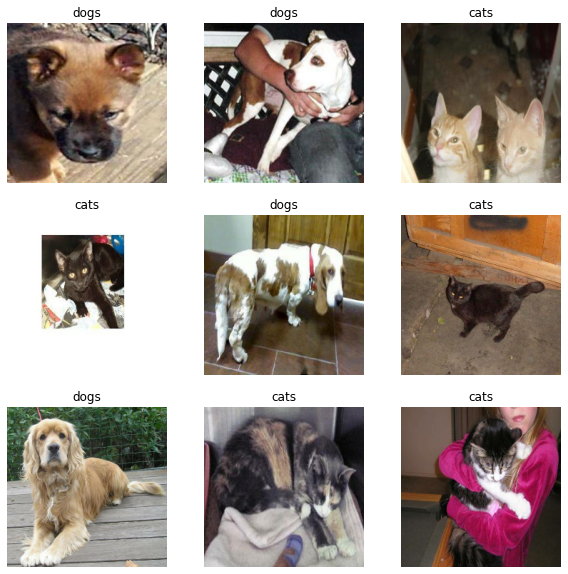

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:

normalization_layer = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [ ]:
#model = Sequential()


In [ ]:
from tensorflow.keras import layers

num_classes = 2

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255,input_shape=(224,224,3)),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 109, 109, 32)      18464     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 52, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 26, 26, 32)       

In [ ]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,validation_data=val_ds,batch_size=32,epochs=25)

Epoch 1/25
200/200 [==============================] - 30s 146ms/step - loss: 0.6933 - accuracy: 0.5174 - val_loss: 0.6888 - val_accuracy: 0.5475
Epoch 2/25
200/200 [==============================] - 29s 144ms/step - loss: 0.6825 - accuracy: 0.5666 - val_loss: 0.6902 - val_accuracy: 0.5444
Epoch 3/25
200/200 [==============================] - 29s 144ms/step - loss: 0.6691 - accuracy: 0.6022 - val_loss: 0.6513 - val_accuracy: 0.6056
Epoch 4/25
200/200 [==============================] - 29s 144ms/step - loss: 0.6388 - accuracy: 0.6347 - val_loss: 0.6657 - val_accuracy: 0.6381
Epoch 5/25
200/200 [==============================] - 29s 143ms/step - loss: 0.6129 - accuracy: 0.6631 - val_loss: 0.6043 - val_accuracy: 0.6913
Epoch 6/25
200/200 [==============================] - 29s 143ms/step - loss: 0.5604 - accuracy: 0.7092 - val_loss: 0.5422 - val_accuracy: 0.7294
Epoch 7/25
200/200 [==============================] - 29s 143ms/step - loss: 0.4998 - accuracy: 0.7612 - val_loss: 0.5275 - val_ac

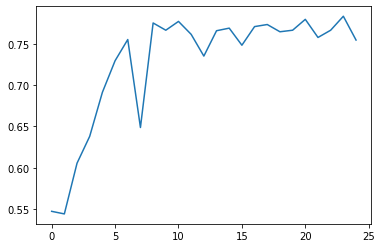

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['val_accuracy'])

In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  '/content/drive/MyDrive/dataset/test_set',
  image_size=(224, 224),
  batch_size=32,
  )

Found 2000 files belonging to 2 classes.


In [ ]:
test_loss, test_acc = model.evaluate(test_ds)

print('\nTest accuracy:', test_acc)

63/63 [==============================] - 6s 92ms/step - loss: 1.3963 - accuracy: 0.7815

Test accuracy: 0.781499981880188


In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_ds)


In [ ]:
predictions[0]


array([0.8233636 , 0.17663637], dtype=float32)

In [ ]:
np.argmax(predictions[0])


0

In [ ]:
cats_path = '/content/drive/MyDrive/dataset/test_set/dogs/dog.4001.jpg'

img = tf.keras.preprocessing.image.load_img(
    cats_path, target_size=(224, 224)
)
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to dogs with a 99.82 percent confidence.
